**Required libraries are imported for analysis and visualization**

In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loads the dataset into Pandas.**

In [480]:
df = pd.read_csv('customer_churn_data.csv')

**Displays first 5 rows to understand the data.**

In [481]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


##**EDA (Exploratory Data Analysis)**

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [483]:
df.isnull().sum().sum()

np.int64(297)

In [484]:
df.isnull().sum()/len(df)*100

,0
CustomerID,0.0
Age,0.0
Gender,0.0
Tenure,0.0
MonthlyCharges,0.0
ContractType,0.0
InternetService,29.7
TotalCharges,0.0
TechSupport,0.0
Churn,0.0


In [485]:
df['InternetService']=df['InternetService'].fillna("")

In [486]:
df.isnull().sum()/len(df)*100

,0
CustomerID,0.0
Age,0.0
Gender,0.0
Tenure,0.0
MonthlyCharges,0.0
ContractType,0.0
InternetService,0.0
TotalCharges,0.0
TechSupport,0.0
Churn,0.0


In [487]:
df.duplicated().sum()

np.int64(0)

In [488]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [489]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [490]:
numeric_column_data= df.select_dtypes(include=['number'])

In [491]:
numeric_column_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


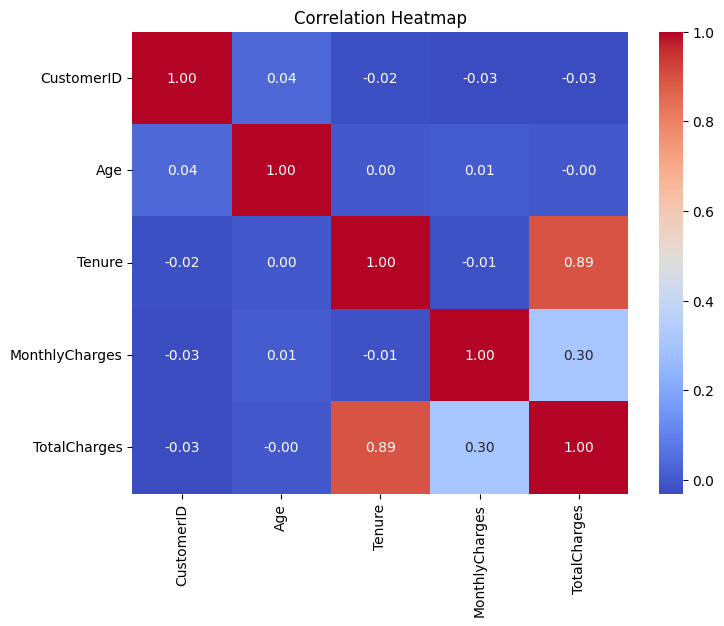

In [492]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_column_data.corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()


* -1 : Strong Negative
*  1 : Strong Positive


---



In [493]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

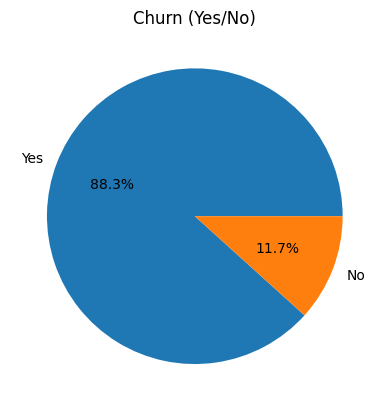

In [494]:
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Churn (Yes/No)')
plt.ylabel('')
plt.show()


In [495]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

Higher MonthlyCharges are associated with higher churn.

Customers paying more are more likely to leave.

Pricing could be a major factor influencing churn.


---



In [496]:
tenure=df.groupby('Churn')['Tenure'].mean()

In [497]:
tenure

,Tenure
Churn,
No,30.264957
Yes,17.476784


In [498]:
df.groupby('Churn')['Age'].mean()

,Age
Churn,
No,43.487179
Yes,44.831257


In [499]:
contract_type_avg_price=df.groupby('ContractType')['MonthlyCharges'].mean()
contract_type_avg_price

,MonthlyCharges
ContractType,
Month-to-Month,75.909198
One-Year,73.822803
Two-Year,71.334500


At the lower terms we can see that the monthly charges average decrases



---



---



##**Visualizations & Analysis**

**1. Age Distribution by Churn**

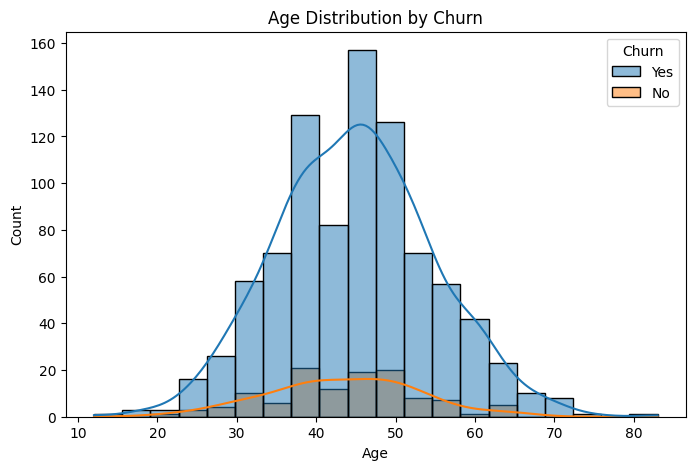

In [500]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Churn', bins=20, kde=True)

plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Analysis:

* Age distribution is fairly uniform.

* No strong age dominance in churn.

* Both young and older customers churn similarly.

Insight:

* Age is not a strong standalone churn indicator.

* Other factors influence churn more significantly.


---



**2. Gender vs Churn**

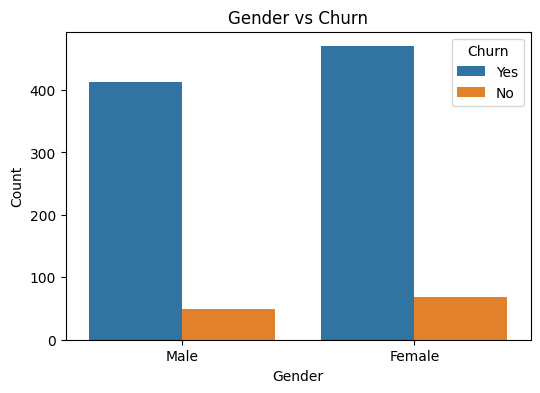

In [501]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Churn', data=df)

plt.title("Gender vs Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Analysis:

* Male and Female customers show similar churn patterns.

* No major gender imbalance in churn rate.

Insight:

* Gender-based marketing may not significantly reduce churn.


---



**3. How Does Contract Type Affect Churn?**

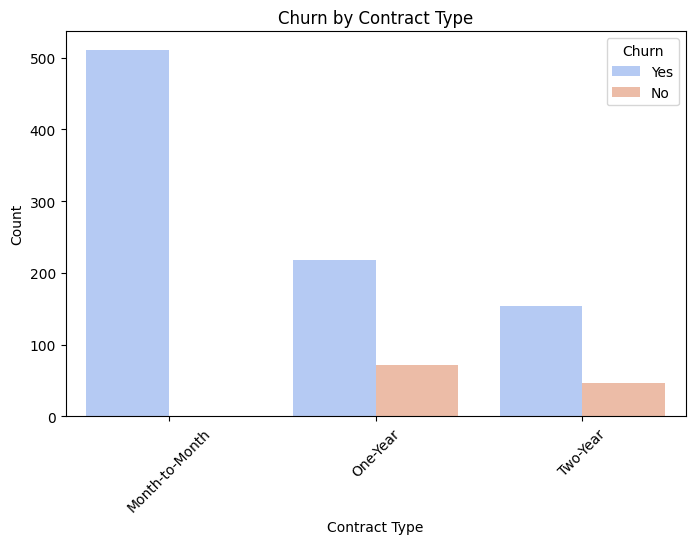

In [502]:
plt.figure(figsize=(8,5))
sns.countplot(x='ContractType', hue='Churn', data=df, palette='coolwarm')

plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Analysis:

* Month-to-Month contracts show highest churn.

* One-Year and longer contracts show lower churn.

Insight:

* Short-term contracts increase churn risk.

* Encourage long-term contracts with discounts.


---



**4. Does Monthly Charges Impact Churn**

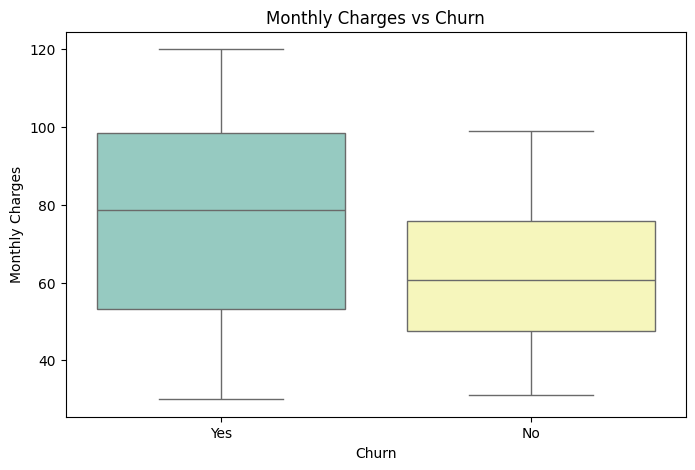

In [503]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')

plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


Analysis:

* Customers who churn tend to have higher monthly charges.

* There is noticeable variation in charges among churned customers.

Insight:

* High pricing could be a major churn factor.

* Review pricing strategy for high-paying customers.


---



**5. Tenure Distribution Based on Churn**

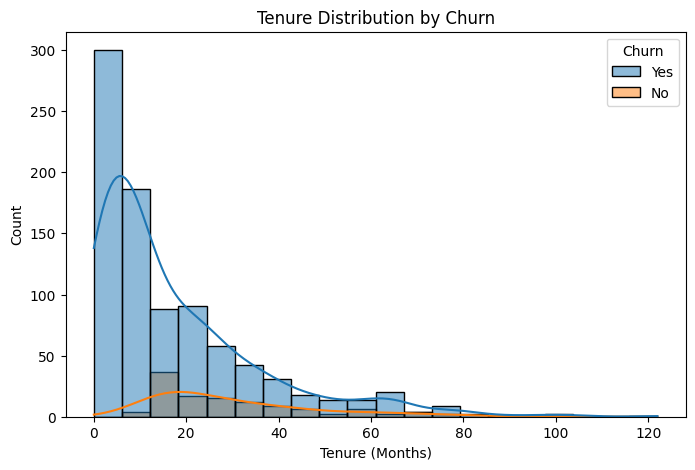

In [504]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Tenure', hue='Churn', bins=20, kde=True)

plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()


Analysis:

* Customers with low tenure churn more.

* Long-term customers are more stable.

Insight:

* Early-stage customers need strong engagement.

* Loyalty programs can reduce early churn.


---





---



##**Feature Engennering**

In [505]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [506]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


**Define Features & Target**

In [507]:
x = df[['Age','Gender','Tenure','MonthlyCharges']]
y = df[['Churn']]

In [508]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


Gender Column:
* 1 = Female
* 0 = Male

In [509]:
# Encode Gender
x['Gender']=x['Gender'].apply(lambda x:1 if x== 'Female' else 0)

In [510]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [511]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


Churn Column:
* Yes = 1
* No = 0

In [512]:
# Encode Target
y['Churn']=y['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [513]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


**Train-Test Split**

In [514]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y # IMPORTANT for imbalanced dataset
                                               )

**Imbalanced Data in Target[Churn]**

In [515]:
df['Churn'].value_counts()

,count
Churn,
Yes,883
No,117


* For Imbalanced data we use class_weight='balanced' for model like Logistic Regression, Decision Tree, Random Forest, SVC.
* KNN is distance based algorithm that's why we use the SMOTE to balanced data.

**Feature Scaling**

In [516]:
from sklearn.preprocessing import StandardScaler

In [517]:
scaler= StandardScaler()

In [518]:
x_train= scaler.fit_transform(x_train)

In [519]:
x_test= scaler.fit_transform(x_test)

In [520]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']



---



###**Model Building**

**Train Multiple Classification Models**

We will apply:

* Logistic Regression

* KNN

* Decision Tree

* Random Forest

* SVM

In [521]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)


In [522]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)


In [523]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm, y_train_sm)

knn_pred = knn.predict(x_test)


In [524]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)


In [525]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,class_weight='balanced')
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)

In [526]:
from sklearn.svm import SVC

svm = SVC(class_weight='balanced')
svm.fit(x_train, y_train)

svm_pred = svm.predict(x_test)


**Model Evaluation (Important for Imbalanced Data)**

* Confusion Matrix

* Precision

* Recall

* F1-score

* ROC-AUC

In [527]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(y_test, y_pred, model_name):
    print("Model:", model_name)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
    print("---------------------------------------------------")

evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, knn_pred, "KNN")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "SVM")

Model: Logistic Regression
Confusion Matrix:
 [[ 14   9]
 [ 57 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.61      0.30        23
           1       0.93      0.68      0.78       177

    accuracy                           0.67       200
   macro avg       0.56      0.64      0.54       200
weighted avg       0.85      0.67      0.73       200

ROC-AUC Score: 0.6433308769344142
---------------------------------------------------
Model: KNN
Confusion Matrix:
 [[ 18   5]
 [ 41 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.78      0.44        23
           1       0.96      0.77      0.86       177

    accuracy                           0.77       200
   macro avg       0.63      0.78      0.65       200
weighted avg       0.89      0.77      0.81       200

ROC-AUC Score: 0.7754851387865389
---------------------------------------------------
Mode

**Compare Accuracy of All Models**

In [528]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": lr_pred,
    "KNN": knn_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred
}

for name, pred in models.items():
    print(name, "Accuracy:", accuracy_score(y_test, pred))

Logistic Regression Accuracy: 0.67
KNN Accuracy: 0.77
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.895
SVM Accuracy: 0.71




---



###**Hyperparameter Tuning using GridSearchCV**

We will tune using F1-score (important for imbalanced dataset).

In [529]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

**1. Logistic Regression Tuning**

In [530]:
lr = LogisticRegression()

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

grid_lr = GridSearchCV(
    lr,
    param_grid_lr,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_lr.fit(X_train_sm, y_train_sm)

print("Best Parameters (LR):", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_


Best Parameters (LR): {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}


**2. KNN Tuning**

In [531]:
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

grid_knn = GridSearchCV(
    knn,
    param_grid_knn,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_knn.fit(X_train_sm, y_train_sm)

print("Best Parameters (KNN):", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_


Best Parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


**3. Random Forest Tuning**

In [532]:
rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100,200],
    'max_depth': [None,5,10],
    'min_samples_split': [2,5],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train_sm, y_train_sm)

print("Best Parameters (RF):", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_


Best Parameters (RF): {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


**4. SVM Tuning**

In [533]:
svm = SVC(probability=True)

param_grid_svm = {
    'C': [0.1,1,10],
    'kernel': ['linear','rbf'],
    'class_weight': ['balanced']
}

grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_svm.fit(X_train_sm, y_train_sm)

print("Best Parameters (SVM):", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_


Best Parameters (SVM): {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}


**After Hyperparameter Tuning :**

In [534]:
models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "KNN": grid_knn.best_estimator_,
    "Random Forest": grid_rf.best_estimator_,
    "SVM": grid_svm.best_estimator_
}

for name, model in models.items():
    print("Model:", name)

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print("------------------------------------------------")


Model: Logistic Regression
Confusion Matrix:
 [[ 14   9]
 [ 58 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.61      0.29        23
           1       0.93      0.67      0.78       177

    accuracy                           0.67       200
   macro avg       0.56      0.64      0.54       200
weighted avg       0.85      0.67      0.72       200

ROC-AUC: 0.703021370670597
------------------------------------------------
Model: KNN
Confusion Matrix:
 [[ 17   6]
 [ 46 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.74      0.40        23
           1       0.96      0.74      0.83       177

    accuracy                           0.74       200
   macro avg       0.61      0.74      0.61       200
weighted avg       0.88      0.74      0.78       200

ROC-AUC: 0.8203144190616556
------------------------------------------------
Model: Random Forest
Co

**Model Comparison**
| Model               | F1 (Class 1) | Recall (1) | ROC-AUC  | Accuracy |
| ------------------- | ------------ | ---------- | -------- | -------- |
| Logistic Regression | 0.78         | 0.67       | 0.70     | 0.67     |
| KNN                 | 0.83         | 0.74       | 0.82     | 0.74     |
| Random Forest       | **0.84**     | **0.76**   | **0.85** | 0.75     |
| SVM                 | 0.83         | 0.73       | 0.81     | 0.73     |


###**Best Model = Random Forest**
* Highest F1-score (0.84)
* Highest Recall (0.76)
* Highest ROC-AUC (0.85)
* Good balance for class 0 and class 1

**For churn prediction:**

* F1-score (Class 1 – churn)

* Recall (Class 1)

* ROC-AUC

* Balanced performance across classes

Accuracy alone is NOT important.



---



###**ROC Curve Plotting (Model Comparison)**

In [535]:
lr_prob = best_lr.predict_proba(x_test)[:,1]
knn_prob = best_knn.predict_proba(x_test)[:,1]
rf_prob = best_rf.predict_proba(x_test)[:,1]
svm_prob = best_svm.predict_proba(x_test)[:,1]

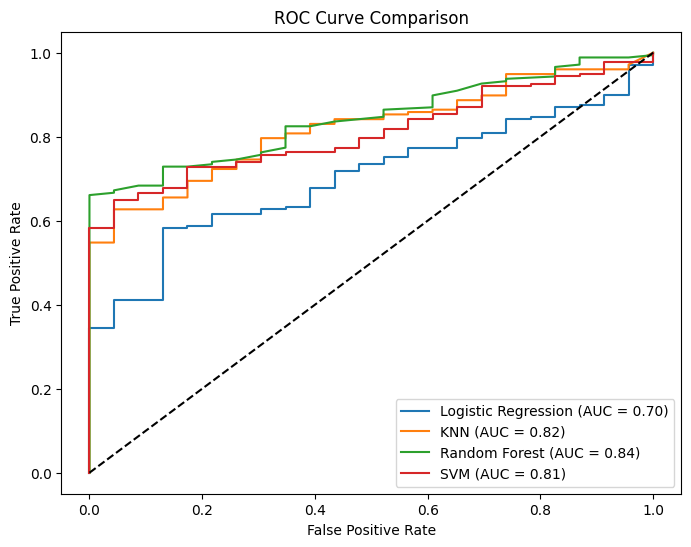

In [536]:
plt.figure(figsize=(8,6))

models = {
    "Logistic Regression": lr_prob,
    "KNN": knn_prob,
    "Random Forest": rf_prob,
    "SVM": svm_prob
}

for name, prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc_score = roc_auc_score(y_test, prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()




---



###**Final Model**

In [537]:
final_model = grid_rf.best_estimator_

In [538]:
# Train on full dataset
final_model

RandomForestClassifier(class_weight='balanced')

In [539]:
import joblib
joblib.dump(final_model, "churn_model.pkl")

['churn_model.pkl']